In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-dataset/healthcare_dataset.csv


In [35]:
dados = pd.read_csv('/kaggle/input/healthcare-dataset/healthcare_dataset.csv')

In [36]:
dados.sample(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
51147,MR. WIlLIAm aCoSTa,53,Male,A+,Hypertension,2020-06-18,Brendan Hodge,"Becker and Hancock Baker,",Medicare,16470.526992,251,Urgent,2020-06-29,Paracetamol,Normal
35539,John JenKIns,22,Female,A-,Arthritis,2023-09-22,Maureen Jones,Jackson-Garcia,Medicare,46286.894979,472,Emergency,2023-09-30,Penicillin,Inconclusive
9365,dAWn skInNer,32,Female,A-,Diabetes,2020-08-27,Paul Weber,"Mcdonald and Cox Miller,",Medicare,19751.510956,270,Elective,2020-09-11,Lipitor,Inconclusive
38018,DaviD bAKeR,18,Female,O-,Cancer,2020-03-21,Christopher Moss,"and Lopez Cummings Harris,",Blue Cross,22745.615810,214,Emergency,2020-04-16,Paracetamol,Normal
40177,LISA hebert,84,Male,AB-,Obesity,2019-06-18,Anthony Castillo,Shannon-Hernandez,UnitedHealthcare,45585.868774,269,Elective,2019-06-23,Ibuprofen,Abnormal
26706,JeNnIfer dickson,35,Male,O-,Asthma,2023-08-27,Jamie Mendoza,Group Bates,Blue Cross,48601.486478,341,Urgent,2023-09-25,Ibuprofen,Inconclusive
43372,NORma dAWsoN,73,Male,A+,Arthritis,2021-07-21,Fernando Smith,"Stephens and Watkins Miller,",Blue Cross,12096.457772,422,Urgent,2021-08-07,Aspirin,Inconclusive
31959,walTEr AgUiLar,42,Female,AB+,Obesity,2020-03-11,Debra Hall,PLC Jackson,UnitedHealthcare,42543.179170,392,Elective,2020-03-23,Lipitor,Inconclusive
981,BReNdaN paRKer,71,Female,A+,Arthritis,2019-09-21,Matthew Taylor,Bailey-White,Cigna,4437.956350,406,Emergency,2019-10-20,Penicillin,Normal
37725,AnTHoNY AndeRSON,53,Male,B+,Hypertension,2023-12-30,Randy Garrett,Khan LLC,Aetna,24803.205251,170,Emergency,2024-01-08,Penicillin,Normal


In [37]:
phillips = dados.query("Hospital == 'Phillips LLC'")

In [38]:
phillips = phillips.dropna()

In [39]:
df = pd.DataFrame(phillips, columns = ['Age', 'Date of Admission', 'Discharge Date'])

In [40]:
df['admissao'] = pd.to_datetime(df['Date of Admission'])
df['alta'] = pd.to_datetime(df['Discharge Date'])

In [41]:
df['tempo_internacao'] = df['alta'] - df['admissao']

In [42]:
df['tempo_internacao'] = pd.to_numeric(df['tempo_internacao'].dt.days, downcast = 'integer')

In [43]:
df = pd.DataFrame(df, columns = ['Age', 'tempo_internacao'])
df

,Age,tempo_internacao
9168,76,15
9406,75,23
16673,55,28
16778,69,16
17097,22,16
29959,55,2
30287,59,22
44648,31,13
46010,64,20
52215,70,16


In [44]:
grupo_a = df.query('Age < 60')
grupo_b = df.query('Age >=60')

In [45]:
import matplotlib.pyplot as plt

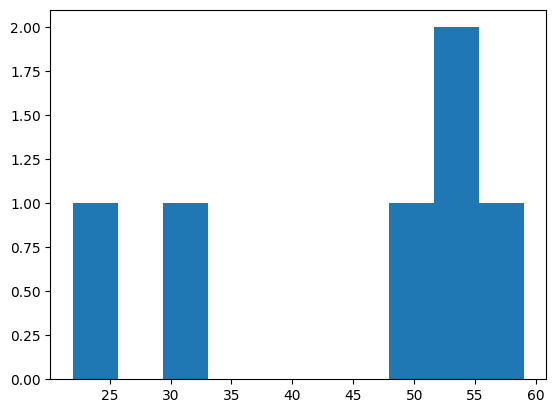

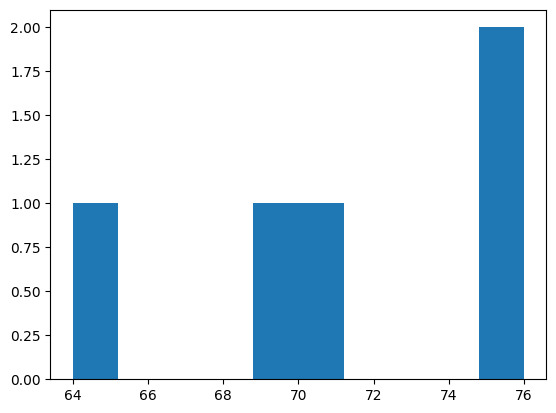

In [46]:

plt.hist(grupo_a['Age'])
plt.show()

plt.hist(grupo_b['Age'])
plt.show()

H_0: A mediana do tempo de internação do Grupo A é igual à mediana do tempo de internação do Grupo B. (Mediana_A = Mediana_B)

H_1: A mediana do tempo de internação do Grupo A é diferente da mediana do tempo de internação do Grupo B. (Mediana_A != Mediana_B)

In [47]:
from scipy.stats import mannwhitneyu

In [48]:
stats, p_valor = mannwhitneyu(grupo_b['tempo_internacao'], grupo_a['tempo_internacao'], alternative='greater')
print(stats)
print(p_valor)

14.0
0.6091204704320803


In [49]:
confianca = 0.05

if p_valor < confianca:
    print("Não rejeitar a hipótese nula. Não há evidências suficientes para afirmar que o tempo de internação é maior para pacientes com 60 anos ou mais.")
else:
    print("Rejeitar a hipótese nula. Há evidências de que o tempo de internação é maior para pacientes com 60 anos ou mais.")

Rejeitar a hipótese nula. Há evidências de que o tempo de internação é maior para pacientes com 60 anos ou mais.
